Model

Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
random_state = 42
import autoreload
# %load_ext autoreload
# %autoreload 2
import python_code.Scripts as sc
import python_code.Reference as ref
import pickle

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score
from treeinterpreter import treeinterpreter as ti
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



print("DONE")

DONE


In [5]:
df = pd.read_csv("./data/finalx2.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FSGRINC   3904 non-null   float64
 1   REALPROP  3904 non-null   float64
 2   FSGA      3904 non-null   float64
 3   FSSSI     3904 non-null   float64
 4   CERTHHSZ  3904 non-null   float64
 5   FSDIS     3904 non-null   float64
 6   FSSLTDE2  3904 non-null   float64
 7   FSUNEARN  3904 non-null   float64
 8   FSTOTDED  3904 non-null   float64
 9   TANF_IND  3904 non-null   float64
 10  LIQRESOR  3904 non-null   float64
 11  FSWAGES   3904 non-null   float64
 12  FSSLTDED  3904 non-null   float64
 13  FSNONCIT  3904 non-null   float64
 14  FSERNDED  3904 non-null   float64
 15  FSEARN    3904 non-null   float64
 16  FSTOTDE2  3904 non-null   float64
 17  FSSTDDE2  3904 non-null   float64
 18  FSERNDE2  3904 non-null   float64
 19  FSUSIZE   3904 non-null   float64
 20  WRK_POOR  3904 non-null   floa

Data Prep

In [7]:
X= df.drop(columns = ['CAT_ELIG'])
y= df['CAT_ELIG']

In [8]:
#baseline, NULL Model
y.value_counts(normalize=True)
#1.0 being 0.662398 your score needs to be at least this number, same for 0.0

1.0    0.662398
0.0    0.337602
Name: CAT_ELIG, dtype: float64

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.3,random_state=random_state)
#.3 is industry standard 30% data is tested,70% trained , can change this if accuracy is not reached

In [10]:
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [11]:
np.savetxt('./data/TrainTest/X_train.csv',X_train,delimiter=',')
np.savetxt('./data/TrainTest/y_train.csv',y_train,delimiter=',')
# np.savetxt('./data/TrainTest/X_test.csv',X_train,delimiter=',')
np.savetxt('./data/TrainTest/y_test.csv',X_train,delimiter=',')

In [12]:
pca = PCA(n_components=10,random_state=42)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

Models

In [13]:
models= {
    'LogReg': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'SVC': SVC(),
    'Naive Bayes': GaussianNB()}

In [14]:
#adapted from Dan Brown Lecture
final= pd.DataFrame(columns= ['cross_val_train','cross_val_test','test_recall','test_precision'])
idx=0
while idx < len(models.keys()):
    for name,model in models.items():
        results= {}
        results['name']=name
        name= model.fit(X_train, y_train)
        y_pred_train= model.predict(X_train)
        y_pred_test= model.predict(X_test)
        results['cross_val_train']= np.mean(cross_val_score(model,X_train,y_train,cv=4))
        results['cross_val_test']= np.mean(cross_val_score(model,X_test,y_test,cv=4))
        results['test_recall']= recall_score(y_test, y_pred_test)
        results['test_precision']= precision_score(y_test, y_pred_test)
        final= final.append(results,ignore_index=True)
        idx+=1
        

C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\1927438446.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final= final.append(results,ignore_index=True)
C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\1927438446.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final= final.append(results,ignore_index=True)
C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\1927438446.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final= final.append(results,ignore_index=True)
C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\1927438446.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final= final.append(results

In [15]:
final.set_index('name')
#see that all scores are above 0.66 which shows no bias

,cross_val_train,cross_val_test,test_recall,test_precision
name,,,,
LogReg,0.884334,0.862628,0.900262,0.903821
Decision Tree,0.900805,0.911263,0.927822,0.935185
Random Forest,0.938141,0.933447,0.961942,0.958170
Gradient Boost,0.941435,0.933447,0.950131,0.961487
Ada Boost,0.922401,0.920648,0.937008,0.939474
SVC,0.884700,0.854949,0.901575,0.928378
Naive Bayes,0.767204,0.741468,0.833333,0.908441


In [16]:
pc_final = pd.DataFrame(columns = ['cross_val_train','cross_val_test','test_recall','test_precision'])
idx=0
while idx < len(models.keys()):
    for name,model in models.items():
        results = {}
        results['name']=name
        name=model.fit(X_train_pc, y_train)
        y_pred_train = model.predict(X_train_pc)
        y_pred_test = model.predict(X_test_pc)
        results['cross_val_train'] = np.mean(cross_val_score(model,X_train_pc,y_train,cv=4))
        results['cross_val_test'] = np.mean(cross_val_score(model,X_test_pc,y_test,cv=4))
        results['test_recall'] = recall_score(y_test, y_pred_test)
        results['test_precision'] = precision_score(y_test, y_pred_test)
        pc_final = pc_final.append(results,ignore_index=True)
        idx+=1

C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\3201788532.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pc_final = pc_final.append(results,ignore_index=True)
C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\3201788532.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pc_final = pc_final.append(results,ignore_index=True)
C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\3201788532.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pc_final = pc_final.append(results,ignore_index=True)
C:\Users\Lily Ewing\AppData\Local\Temp\ipykernel_25780\3201788532.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pc_fin

In [17]:
pc_final.set_index('name')

,cross_val_train,cross_val_test,test_recall,test_precision
name,,,,
LogReg,0.783675,0.763652,0.892388,0.770102
Decision Tree,0.837116,0.813993,0.892388,0.884265
Random Forest,0.881406,0.864334,0.938320,0.892634
Gradient Boost,0.877379,0.860068,0.908136,0.882653
Ada Boost,0.852855,0.848123,0.900262,0.879487
SVC,0.831991,0.834471,0.874016,0.871728
Naive Bayes,0.726940,0.713311,0.958005,0.692600


Extra Tree Classifier

In [18]:
et= ExtraTreeClassifier()
params={'max_depth':[None,3,4],
        'max_features':[None,'auto'],
        'max_leaf_nodes':[5,10]}
et_gs= GridSearchCV(et,param_grid=params)
et_gs.fit(X_train,y_train)
print(et_gs.best_score_)
et_gs.best_params_

0.8367284756681466


{'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10}

Bagging Classifier

In [19]:
bag= BaggingClassifier()
bag.fit(X_train,y_train)
y_pred_train= bag.predict(X_train)
y_pred_test= bag.predict(X_test)
print(f'cross_val_train= {np.mean(cross_val_score(model,X_train_pc,y_train,cv=4))}')
print(f'cross_val_train= {np.mean(cross_val_score(model,X_test_pc,y_test,cv=4))}')
print(f'test_recall= {recall_score(y_test,y_pred_test)}')
print(f'test_precision= {precision_score(y_test,y_pred_test)}')

cross_val_train= 0.7269399707174231
cross_val_train= 0.7133105802047782
test_recall= 0.9488188976377953
test_precision= 0.9550858652575958


Final Model

In [20]:
vote= VotingClassifier([
    ('rf',RandomForestClassifier(bootstrap=False,n_estimators=1000)),
    ('gb',GradientBoostingClassifier(max_depth=10,subsample=0.8)),
    ('bag',BaggingClassifier(n_estimators=10))
])

In [21]:
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     n_estimators=1000)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=10,
                                                         subsample=0.8)),
                             ('bag', BaggingClassifier())])

In [22]:
filename= 'final_model.sav'
pickle.dump(vote,open(filename, 'wb'))

Running Models

In [23]:
rf= RandomForestClassifier()
params= {'max_depth':[None,3,4],
         'max_features':[None,'auto'],
         'n_estimators':[75,100,125]}
rf_gs= GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_


0.9447261452745914


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}

In [24]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
instances= X_test[[735]]
instances

array([[-1.25472977, -0.03517855, -0.1335093 , -0.42833737,  1.02614408,
        -0.51403261, -0.87253073, -0.91848291,  0.39411313, -0.36488324,
        -0.24501332, -0.55893964,  1.0459183 ,  1.78070948, -0.59758589,
        -0.59800159, -1.28640995, -1.59315573, -0.56404251,  1.02614408,
        -0.76825854, -0.24309398, -0.34230342, -0.51614194, -0.40909055,
         1.00652396, -1.49056789, -0.8826584 , -0.88061189, -0.59885312,
        -0.02833014, -0.35352552]])

In [26]:
ft_list=[]
prediction, bias, contributions= ti.predict(rf, instances)
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print("Feature contributions:")
for c, feature in zip(contributions[0],
                      X.columns):
    ft_list.append((feature, np.round(c,2)))
    print(feature,c)
    
labels, values= zip(*ft_list)

Prediction [[0.65 0.35]]
Bias (trainset prior) [[0.33285139 0.66714861]]
Feature contributions:
FSGRINC [ 0.0129955 -0.0129955]
REALPROP [ 8.18776123e-05 -8.18776123e-05]
FSGA [ 0.00320541 -0.00320541]
FSSSI [ 0.01504463 -0.01504463]
CERTHHSZ [ 0.02947745 -0.02947745]
FSDIS [ 0.00178857 -0.00178857]
FSSLTDE2 [-0.00081925  0.00081925]
FSUNEARN [ 0.0239834 -0.0239834]
FSTOTDED [-0.05432366  0.05432366]
TANF_IND [ 0.02048719 -0.02048719]
LIQRESOR [-0.02692989  0.02692989]
FSWAGES [-0.00675846  0.00675846]
FSSLTDED [ 0.13843263 -0.13843263]
FSNONCIT [ 0.01506432 -0.01506432]
FSERNDED [-0.01438242  0.01438242]
FSEARN [-0.00628775  0.00628775]
FSTOTDE2 [ 0.00502763 -0.00502763]
FSSTDDE2 [ 0.04309689 -0.04309689]
FSERNDE2 [-0.00698699  0.00698699]
FSUSIZE [ 0.00625466 -0.00625466]
WRK_POOR [-0.00304939  0.00304939]
FSASSET [-0.02429334  0.02429334]
FSTANF [ 0.03306546 -0.03306546]
HWGT [ 0.03794798 -0.03794798]
FSNELDER [ 0.00123963 -0.00123963]
SHELDED [ 0.11133441 -0.11133441]
TPOV [-0.0128

In [27]:
df1= pd.DataFrame(ft_list,columns=['feature','array'])
df2= pd.DataFrame(df1["array"].to_list(), columns=['pred_0','pred_1'])
coef_df= pd.concat([df1,df2],axis=1).drop(columns=['array'])
coef_df.to_csv('./data/2018_indicators/coef.csv',index=None)

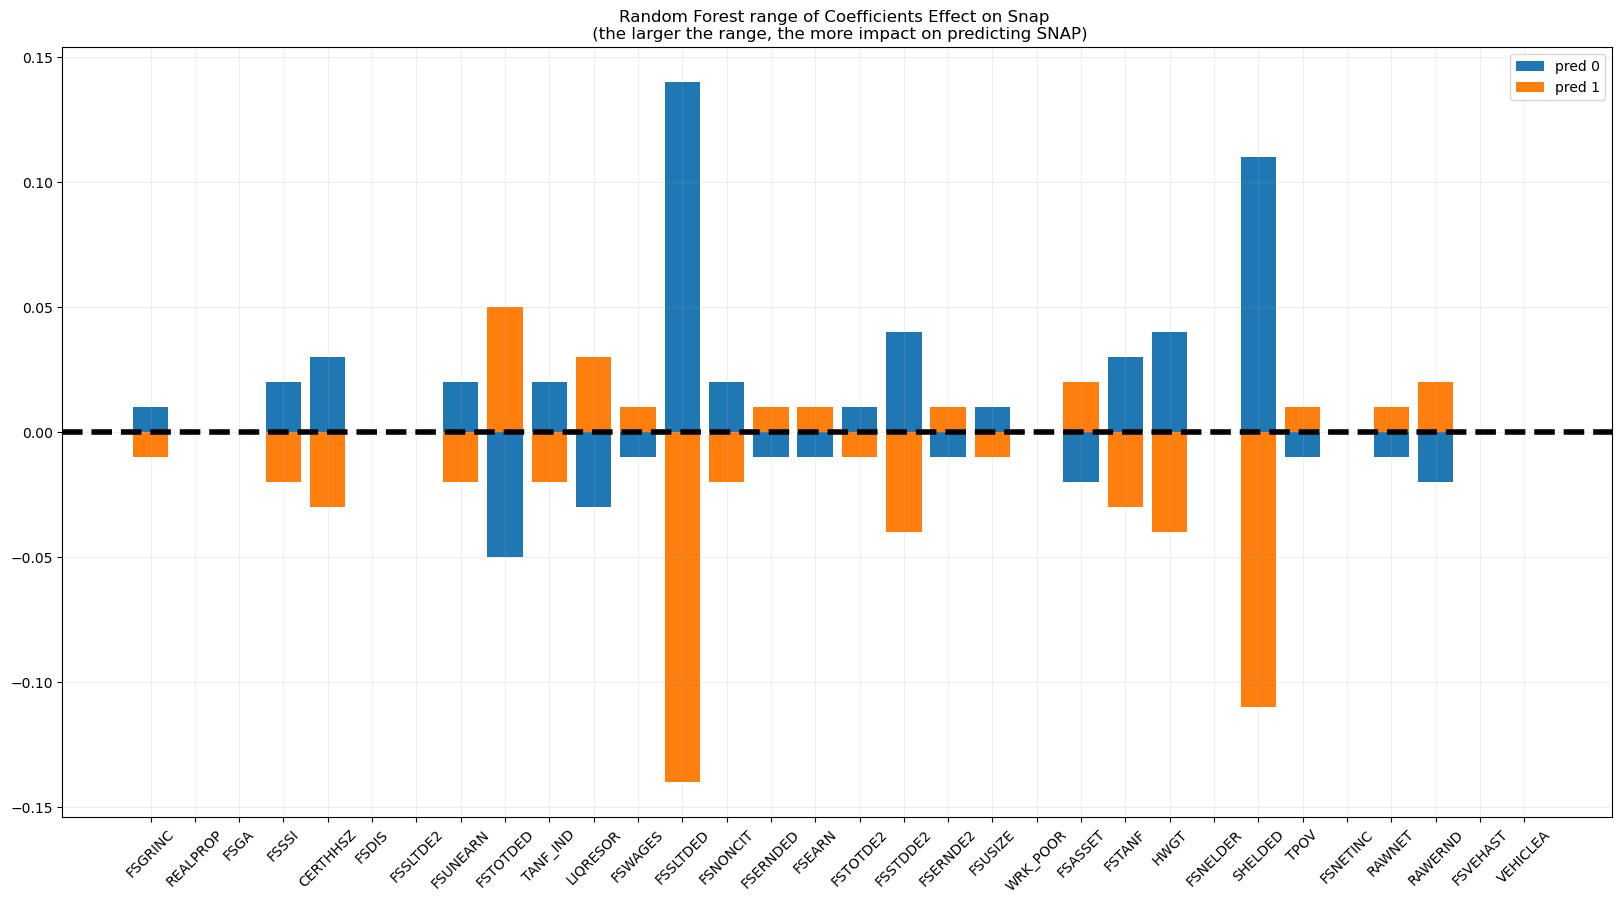

In [28]:
fig, ax= plt.subplots(figsize=(20,10))
plt.title('Random Forest range of Coefficients Effect on Snap \n (the larger the range, the more impact on predicting SNAP)')
plt.grid(zorder=0,alpha=0.2)
xs= np.arange(len(labels))
ax.bar(xs,coef_df['pred_0'], label='pred 0')
ax.bar(xs,coef_df['pred_1'], label='pred 1')
ax.axhline(y=0,linestyle='--',color='black',linewidth=4)
ax.set_xticks(coef_df.index)
ax.set_xticklabels(coef_df['feature'],rotation=45)
plt.legend()
plt.savefig('./images/rf_corr.png');

Reiterated

In [34]:
rf= RandomForestClassifier()
params= {'max_depth':[15,5,4],
         'max_features':['sqrt','log2'],
         'n_estimators':[20,100,200]}
rf_gs= GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_


0.9450917759875713


{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 200}

In [32]:
rf= RandomForestClassifier()
params= {'max_depth':[25,3,4],
         'max_features':['log2','auto'],
         'n_estimators':[200,100,125]}
rf_gs= GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_


0.9443598449082911


{'max_depth': 25, 'max_features': 'auto', 'n_estimators': 100}

In [33]:
rf= RandomForestClassifier()
params= {'max_depth':[25,3,4],
         'max_features':[None,'log2'],
         'n_estimators':[75,50,125]}
rf_gs= GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_


0.9450944546008533


{'max_depth': 25, 'max_features': 'log2', 'n_estimators': 125}